## Bikes mod Project Analysis 
We split the project into 3 sections 
* Understanding data 
* univariant analysis
* Bivariate analysis

#### Import some helper modules

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [227]:
%matplotlib inline
sns.set_style('whitegrid')
sns.set(rc = {'figure.figsize':(15,5)})
sns.set_palette('rocket')

#### Read the data set from csv file by pandas

In [228]:
df = pd.read_csv('bikes_mod.csv')

## Data Understanding  

#### Check the head of data 
* First 3 observation , record , row

In [229]:
df.head(3)

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,107.328767
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0,8,32,40,275.028767
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0,5,27,32,201.928767


#### Check the tail of data 
* Last 3 observation , record , row

In [230]:
df.tail(3)

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,773.828767
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,709.328767
10885,2012-12-19 23:00:00,Winter,0.0,1.0,Clear,13.12,66.0,8.9981,4,84,88,429.828767


#### Check Shape of data set 
* We found that it contain ( 10886 row ) and ( 12 columns )
* so it contain 12 Feature

In [231]:
df.shape

(10886, 12)

In [232]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'casual', 'registered', 'rented_bikes_count',
       'Profit'],
      dtype='object')

#### Show Data type for every feature as follow

In [233]:
df.dtypes

datetime               object
season                 object
holiday               float64
workingday            float64
weather                object
temp                  float64
humidity              float64
windspeed             float64
casual                  int64
registered              int64
rented_bikes_count      int64
Profit                float64
dtype: object

#### Get infromation about data set 
* Data set consist of 12 feature and 10885 record 
* Data types of the feature are (float64(6), int64(3), object(3))
* there are missing value in some feature like (temp , humidity , .... )
* memory usage of data is 1020.7+ KB

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            10886 non-null  object 
 1   season              10672 non-null  object 
 2   holiday             10030 non-null  float64
 3   workingday          9388 non-null   float64
 4   weather             8746 non-null   object 
 5   temp                8104 non-null   float64
 6   humidity            7462 non-null   float64
 7   windspeed           6820 non-null   float64
 8   casual              10886 non-null  int64  
 9   registered          10886 non-null  int64  
 10  rented_bikes_count  10886 non-null  int64  
 11  Profit              10886 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 1020.7+ KB


#### Show how many records are missed in each feature 

In [235]:
missing_data = df.isnull().sum().to_frame()
missing_data.columns = ['NO_missing']
missing_data.T

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit
NO_missing,0,214,856,1498,2140,2782,3424,4066,0,0,0,0


<AxesSubplot:xlabel='NO_missing'>

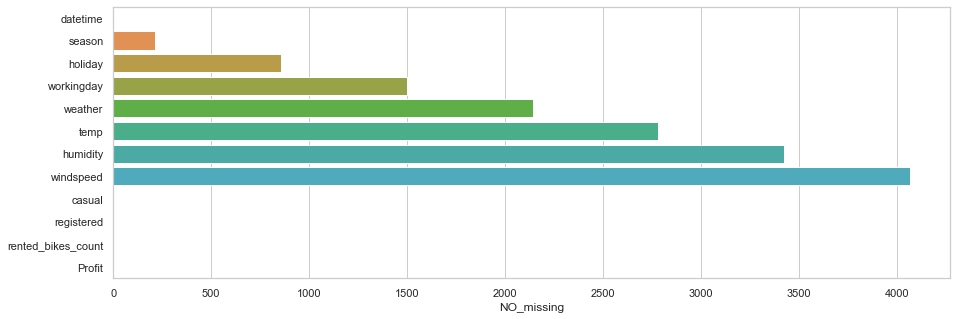

In [236]:
sns.set_style('whitegrid')
sns.barplot(data = missing_data , y = missing_data.index , x = 'NO_missing')

* As showen above we find that windspeed feature contains the largest number of missing values on the other hand season contains the least number of missing data and (casual , registered , rented_bikes_count , Profit) have no missing data 

#### Now Check Duplicated rocords 

In [237]:
df.duplicated().sum()

0

* NO Duplicated Data Found

## Univariant Analysis

In [238]:
df.tail(3)

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,773.828767
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,709.328767
10885,2012-12-19 23:00:00,Winter,0.0,1.0,Clear,13.12,66.0,8.9981,4,84,88,429.828767


* datetime feature we can extract from it (time , year , month , day) <br> feature like (holiday, working data not useful and contain many missing values and non understanding data drop them)
let's do this 

In [239]:
df['year'] = df['datetime'].apply(lambda x : x.split('-')[0])

In [240]:
df['month'] = df['datetime'].apply(lambda x : x.split('-')[1])

In [241]:
df['day'] = df['datetime'].apply(lambda x : x.split('-')[2].split(' ')[0])

In [242]:
df['time'] = df['datetime'].apply(lambda x : x.split('-')[2].split(' ')[1])

In [243]:
df['hour'] = df['time'].apply(lambda x : x.split(':')[0])

In [244]:
df['min'] = df['time'].apply(lambda x : x.split(':')[1])

In [245]:
df['sec'] = df['time'].apply(lambda x : x.split(':')[2])

In [246]:
df['min'].value_counts() , df['sec'].value_counts()

(00    10886
 Name: min, dtype: int64,
 00    10886
 Name: sec, dtype: int64)

* No minutes and seconds so we drop them 

In [247]:
df.drop(['min' , 'sec' , 'time' , 'holiday' , 'workingday'] , axis = 'columns' , inplace = True)

In [248]:
df.head(3)

,datetime,season,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit,year,month,day,hour
0,2011-01-01 00:00:00,Spring,Clear,9.84,81.0,NaN,3,13,16,107.328767,2011,01,01,00
1,2011-01-01 01:00:00,Spring,NaN,9.02,80.0,0.0,8,32,40,275.028767,2011,01,01,01
2,2011-01-01 02:00:00,Spring,Clear,9.02,NaN,0.0,5,27,32,201.928767,2011,01,01,02


#### Season Distibution
* Categorical Feature

In [249]:
df['season'].unique() # has 4 values and has missing values too 

array(['Spring', nan, 'Summer', 'Fall', 'Winter'], dtype=object)

In [250]:
order = df['season'].value_counts().index
df['season'].value_counts().to_frame().T

,Winter,Fall,Summer,Spring
season,2688,2680,2670,2634


In [251]:
df['season'].isnull().sum() # has 214 missing value

214

<AxesSubplot:xlabel='season', ylabel='count'>

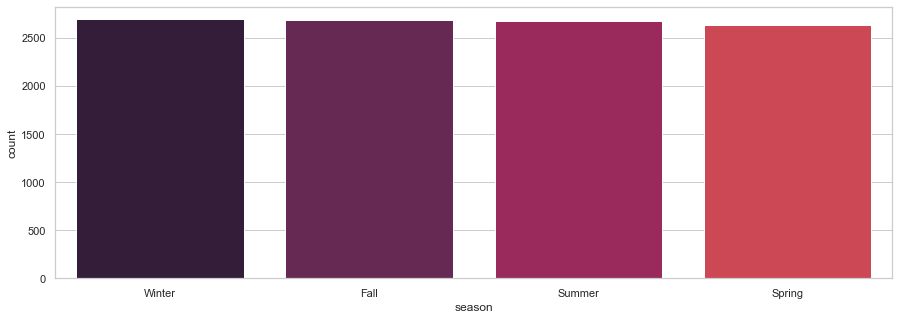

In [252]:
sns.countplot(data = df , x = 'season' , order = order)

#### Weaher Distripution
* Categorical Feature

In [253]:
df['weather'].unique() # has 4 values and missing data 

array(['Clear', nan, 'Mist', 'Rainy', 'Snowy'], dtype=object)

In [254]:
idx = df['weather'].value_counts().index
df['weather'].value_counts().to_frame().T

,Clear,Mist,Rainy,Snowy
weather,5793,2259,693,1


In [255]:
df['weather'].isnull().sum() # has 2140 missing value

2140

<AxesSubplot:xlabel='weather', ylabel='count'>

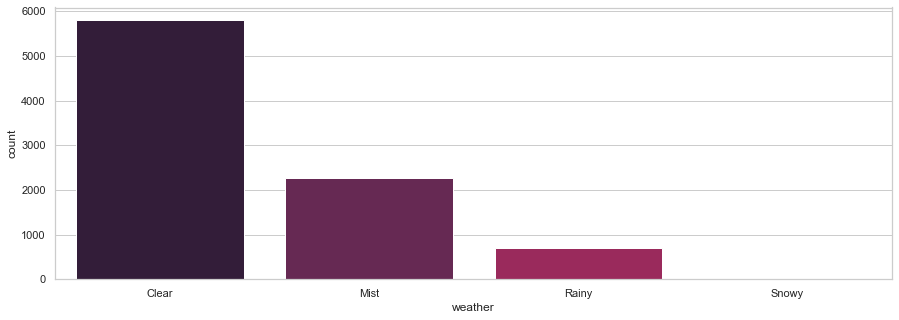

In [256]:
sns.countplot(data = df , x = 'weather' , order = idx )

* we found that people rent more bikes when weather is clear and when it is snowy it is decrease

#### Temprature Distibution
* Numerical Feature

In [257]:
df['temp'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
temp,8104.0,20.317665,7.818568,0.82,13.94,20.5,26.24,41.0


<AxesSubplot:xlabel='temp', ylabel='Count'>

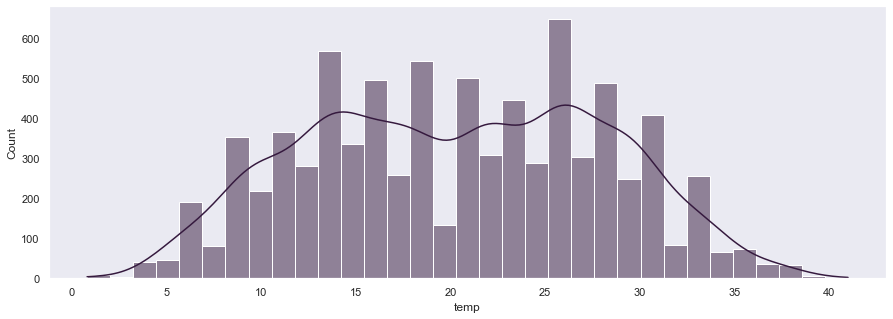

In [258]:
sns.set_style('dark')
sns.histplot(data = df , x = 'temp' , kde = True )

<AxesSubplot:xlabel='temp'>

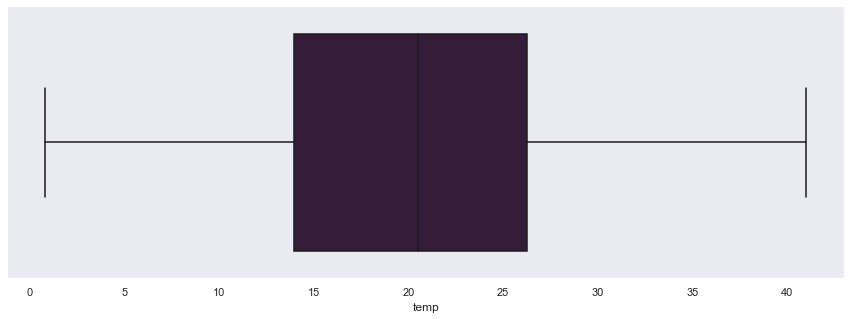

In [259]:
sns.boxplot(data = df , x = 'temp')

* there is no outlier in temp feature and nearly Bimodal Distibution

#### Humidity Distribution
* Numerical Feature 

In [260]:
des = df['humidity'].describe()
des.to_frame().T

,count,mean,std,min,25%,50%,75%,max
humidity,7462.0,61.790673,19.262084,0.0,47.0,62.0,77.0,100.0


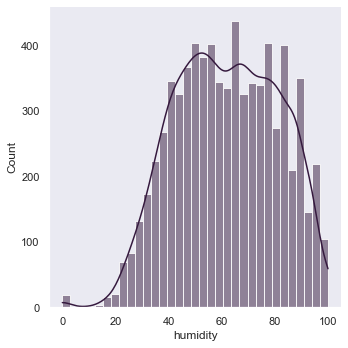

In [261]:
sns.displot(data = df , x = 'humidity' , kde = True)

<AxesSubplot:xlabel='humidity'>

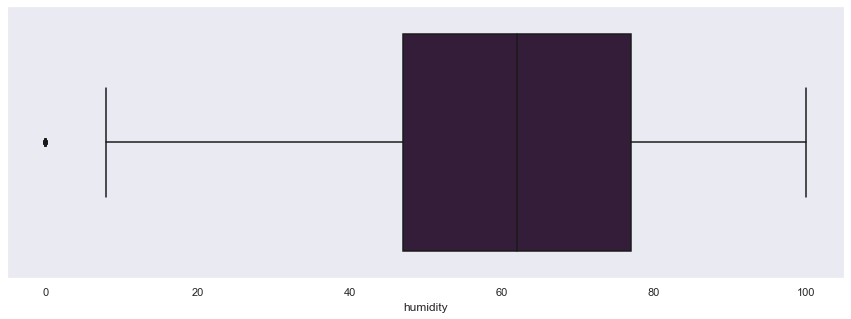

In [262]:
sns.boxplot(data = df , x = 'humidity')

In [263]:
df[ df['humidity'] < (des['25%'] - (1.5 * (des['75%'] - des['25%']))) ].shape[0]

19

* we found 19 point is outlier and nearly skewed to the left

#### Wind Speed Distribution
* Numerical Feature 

In [264]:
des = df['windspeed'].describe()
des.to_frame().T

,count,mean,std,min,25%,50%,75%,max
windspeed,6820.0,12.708806,8.131154,0.0,7.0015,12.998,16.9979,56.9969


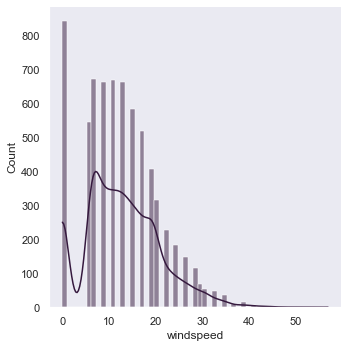

In [265]:
sns.displot(data = df , x = 'windspeed' , kde = True)

<AxesSubplot:xlabel='windspeed'>

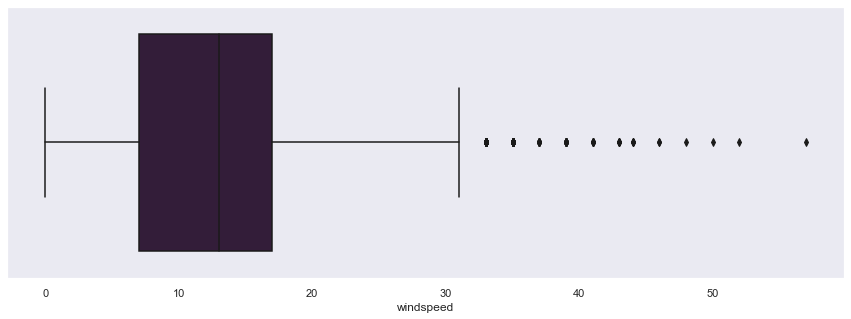

In [266]:
sns.boxplot(data = df , x = 'windspeed')

In [267]:
df[ df['windspeed'] > (des['75%'] + (1.5 * (des['75%'] - des['25%'])))].shape[0]

132

* we find 132 points outlier and not normal distribution

#### Casual Distribution
* Numerical Feature 

In [268]:
des = df['casual'].describe()
des.to_frame().T

,count,mean,std,min,25%,50%,75%,max
casual,10886.0,36.021955,49.960477,0.0,4.0,17.0,49.0,367.0


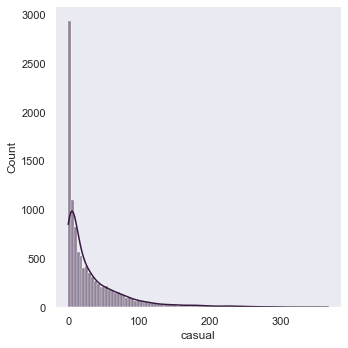

In [269]:
sns.displot(data = df ,x = 'casual' , kde = True)

<AxesSubplot:xlabel='casual'>

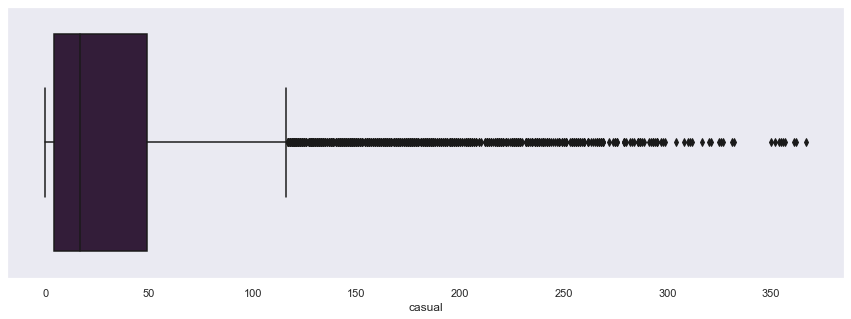

In [270]:
sns.boxplot(data = df , x = 'casual')

In [271]:
df[ df['casual'] > (des['75%'] + (1.5 * (des['75%'] - des['25%'])))].shape[0]

749

* we found many point (749)is outlier and is not normal distribution at all 

#### Registered Distribution
* Numerical Feature 

In [272]:
des = df['registered'].describe()
des.to_frame().T

,count,mean,std,min,25%,50%,75%,max
registered,10886.0,155.552177,151.039033,0.0,36.0,118.0,222.0,886.0


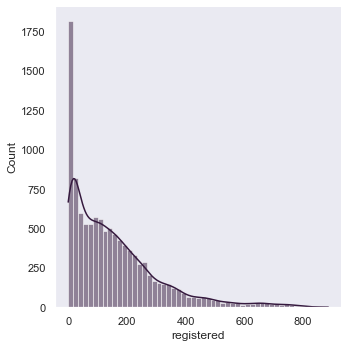

In [273]:
sns.displot(data = df ,x = 'registered' , kde = True)

<AxesSubplot:xlabel='registered'>

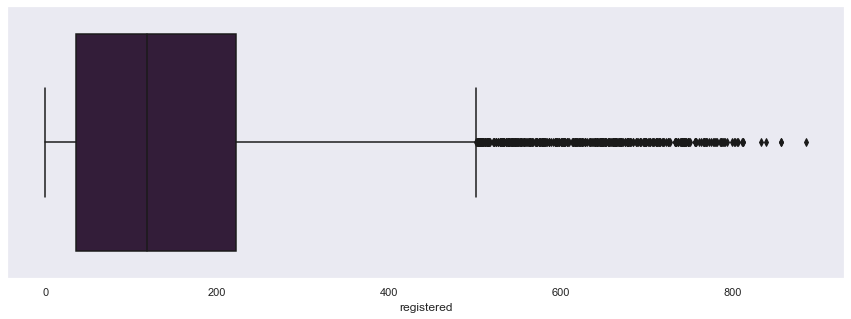

In [274]:
sns.boxplot(data = df ,x = 'registered')

In [275]:
df[ df['registered'] > (des['75%'] + (1.5 * (des['75%'] - des['25%'])))].shape[0]

423

* we found many point outlier (423) and not normal distribution at all

#### Rented_bikes_count Distribution
* Numerical Feature 

In [276]:
des = df['rented_bikes_count'].describe()
des.to_frame().T

,count,mean,std,min,25%,50%,75%,max
rented_bikes_count,10886.0,191.574132,181.144454,1.0,42.0,145.0,284.0,977.0


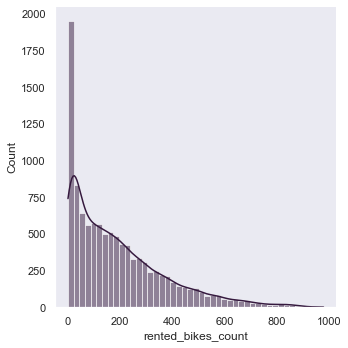

In [277]:
sns.displot(data = df , x = 'rented_bikes_count' , kde = True )

<AxesSubplot:xlabel='rented_bikes_count'>

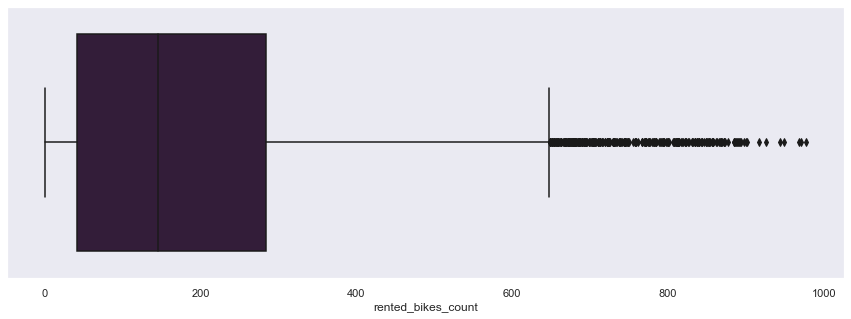

In [278]:
sns.boxplot(data = df ,x = 'rented_bikes_count')

In [279]:
df[ df['rented_bikes_count'] > (des['75%'] + (1.5 * (des['75%'] - des['25%'])))].shape[0]

300

* 300 outlier point and not normal distibution

#### Profit Distibution 
* Numerical Feature 

In [280]:
des = df['Profit'].describe()
des.to_frame().T

,count,mean,std,min,25%,50%,75%,max
Profit,10886.0,1288.280751,1309.6834,4.128767,253.528767,889.928767,1891.828767,7881.728767


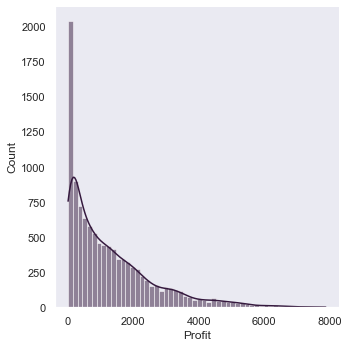

In [281]:
sns.displot(data = df ,x = 'Profit' , kde = True )

<AxesSubplot:xlabel='Profit'>

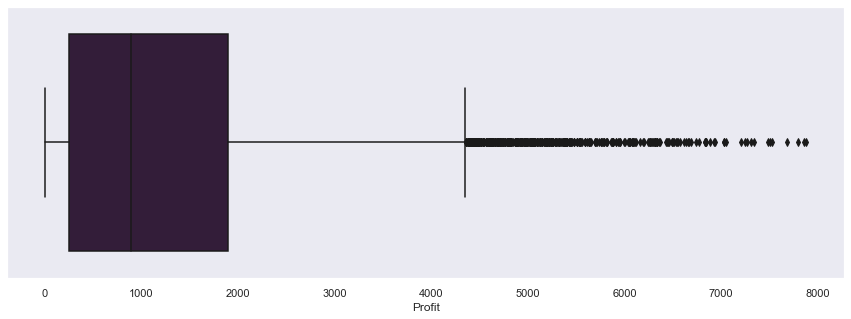

In [282]:
sns.boxplot(data = df ,x = 'Profit')

In [283]:
df[ df['Profit'] > (des['75%'] + (1.5 * (des['75%'] - des['25%'])))].shape[0]

433

* 433 outlier point and not normal distibution

#### Year Distribution
* Categorical Feature 

In [284]:
df['year'].value_counts().to_frame().T

,2012,2011
year,5464,5422


In [285]:
df['year'].unique()

array(['2011', '2012'], dtype=object)

In [286]:
df['year'].isnull().sum() # no missing value 

0

<AxesSubplot:xlabel='year', ylabel='count'>

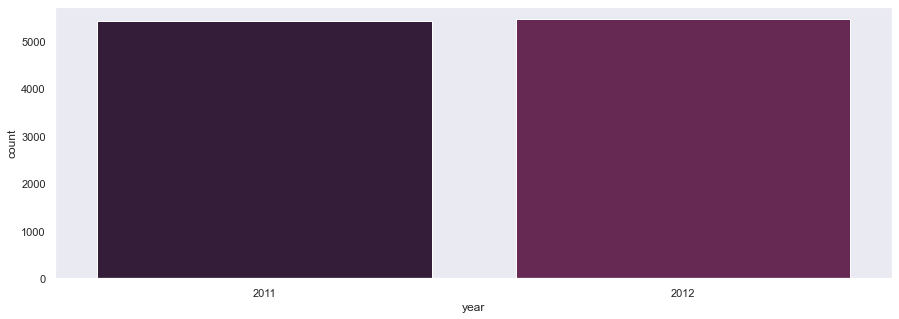

In [287]:
sns.countplot(data = df , x = 'year')

### Month Distribution
* Categorical Feature

In [288]:
df['month'].value_counts().to_frame().T

,05,06,07,08,12,10,11,04,09,02,03,01
month,912,912,912,912,912,911,911,909,909,901,901,884


In [289]:
df['month'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

In [290]:
df['month'].isnull().sum() # no missing data 

0

<AxesSubplot:xlabel='month', ylabel='count'>

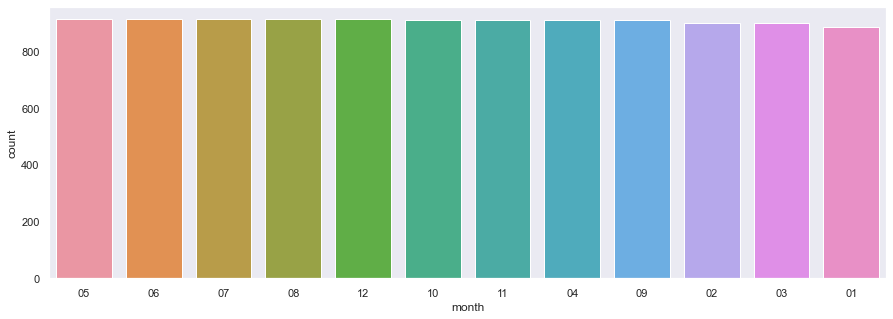

In [291]:
sns.countplot(data = df , x = 'month' , order = df['month'].value_counts().index)

## Bivariate analysis

### In which season gain max , min  profit ? 

In [292]:
group = df.groupby('season')['Profit'].sum().sort_values(ascending = False)
group.to_frame().T

season,Fall,Summer,Winter,Spring
Profit,4.509295e+06,4.093775e+06,3.286013e+06,1.836294e+06


In [293]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='season', ylabel='Profit'>

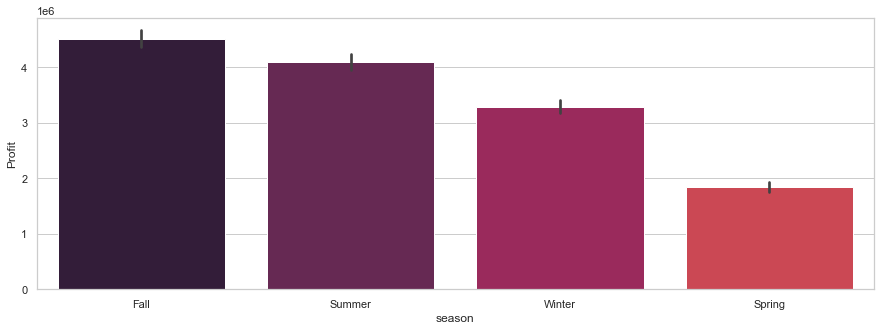

In [294]:
sns.barplot(data = df , x = 'season' , y = 'Profit' , estimator = np.sum
            , order = group.index )

* Fall season is the highest profit on the other hand spring is the lowest profit

### what is the average profit for each season ?

In [295]:
group = df.groupby('season')['Profit'].mean()
group.to_frame().T

season,Fall,Spring,Summer,Winter
Profit,1682.572797,697.150331,1533.249029,1222.474898


<AxesSubplot:xlabel='season', ylabel='Profit'>

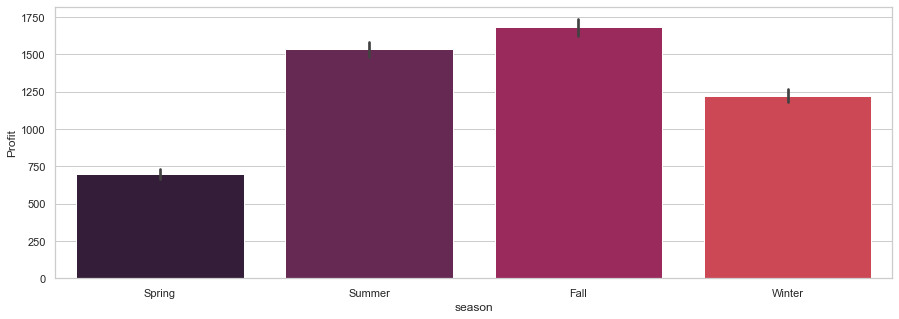

In [296]:
sns.barplot(data = df , x = 'season' , y = 'Profit' , estimator = np.mean)

### In each season what is the number of rented bike ?

In [297]:
group = df.groupby('season')['rented_bikes_count'].sum().sort_values(ascending = False)
group.to_frame().T

season,Fall,Summer,Winter,Spring
rented_bikes_count,628384,573280,534031,305779


<AxesSubplot:xlabel='season', ylabel='rented_bikes_count'>

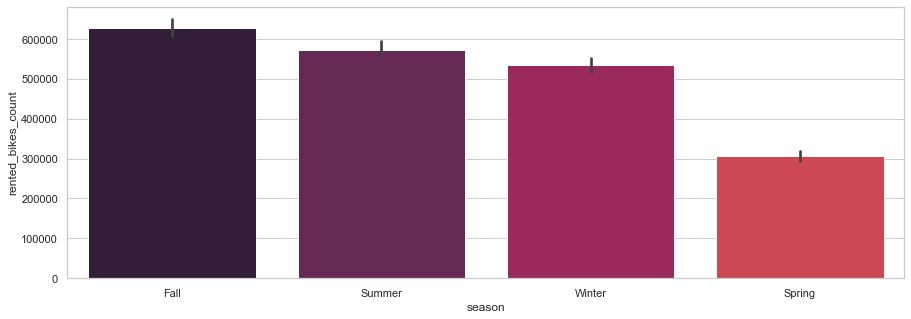

In [298]:
sns.barplot(data = df , x = 'season' , y = 'rented_bikes_count' , estimator = np.sum , order = group.index)

* Fall season has the highest number of rented bikes and Spring has the least 

### For each season what is the highest user (casual or registered)?

In [299]:
group = df.groupby('season')[['casual' , 'registered']].sum()
group

,casual,registered
season,,
Fall,140132,488252
Spring,40457,265322
Summer,126289,446991
Winter,76755,457276


<AxesSubplot:ylabel='season'>

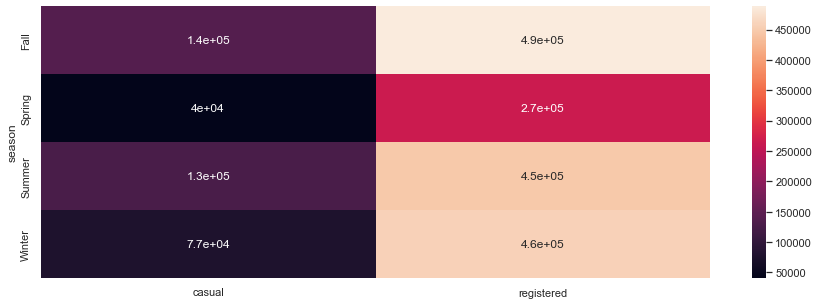

In [300]:
sns.heatmap(group , annot = True)

registered customer is more than casual customer 

### For each year What is the Profit ?

In [301]:
group = df.groupby('year')['Profit'].sum()
group.to_frame().T

year,2011,2012
Profit,5.371621e+06,8.652604e+06


<AxesSubplot:xlabel='year', ylabel='Profit'>

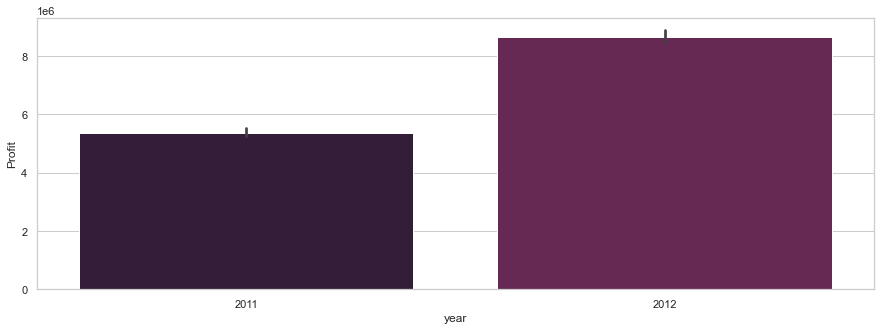

In [302]:
sns.barplot(data = df , x = 'year' , y = 'Profit' , estimator = np.sum)

* year 2012 has max profit

### What is the Profit for each month per Year

In [303]:
df.groupby(['year' , 'month'])['Profit'].sum().to_frame().unstack()

Profit                                               \
month             01             02             03             04   
year                                                                
2011   127102.998630  189863.230137  268523.130137  374899.289041   
2012   309797.631507  356099.689041  628599.289041  858361.360274   

                                                                   \
month             05             06             07             08   
year                                                                
2011   547346.317808  638798.717808  736438.817808  584876.717808   
2012   845706.117808  936801.617808  843474.417808  924808.917808   

                                                                   
month             09             10             11             12  
year                                                               
2011   576281.531507  563217.789041  435744.117808  328527.917808  
2012   929560.417808  819914.717808  649845.589041  549633.917808

<AxesSubplot:xlabel='month', ylabel='Profit'>

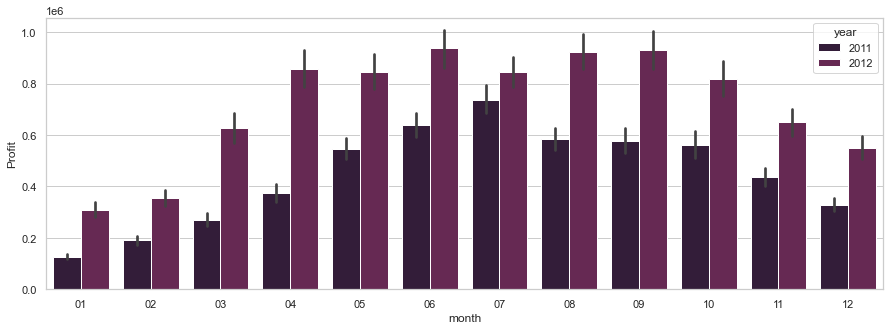

In [304]:
sns.barplot(data = df , hue = 'year' , y = 'Profit' , x = 'month' , estimator = np.sum)

### What is total Profit for each month in 2012 ? 

In [305]:
df_2012 = df[ df['year'] == '2012']

In [306]:
group = df_2012.groupby('month')['Profit'].sum().sort_values(ascending = False)
group.to_frame().T

month,06,09,08,04,05,07,10,11,03,12,02,01
Profit,936801.617808,929560.417808,924808.917808,858361.360274,845706.117808,843474.417808,819914.717808,649845.589041,628599.289041,549633.917808,356099.689041,309797.631507


<AxesSubplot:xlabel='month', ylabel='Profit'>

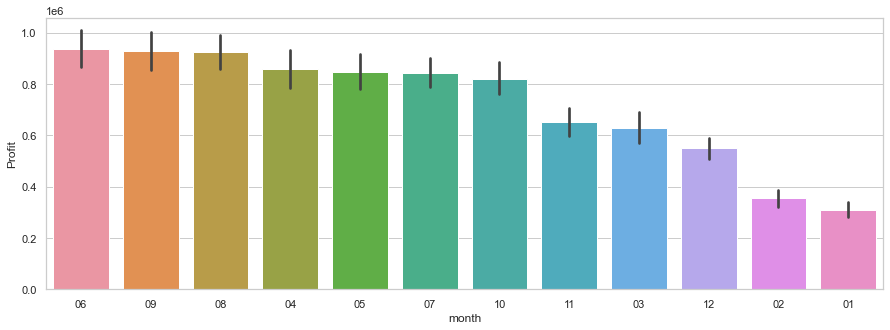

In [307]:
sns.barplot(data = df_2012 , x = 'month' , y = 'Profit' , estimator = np.sum , order = group.index)

### What is the highest hour that get max profit and rented bikes 

In [308]:
group = df.groupby('hour')['Profit'].sum().sort_values(ascending = False)
group.to_frame().head()

,Profit
hour,
17,1.362850e+06
18,1.205913e+06
16,1.061936e+06
15,9.457800e+05
13,9.410371e+05


<AxesSubplot:xlabel='hour', ylabel='Profit'>

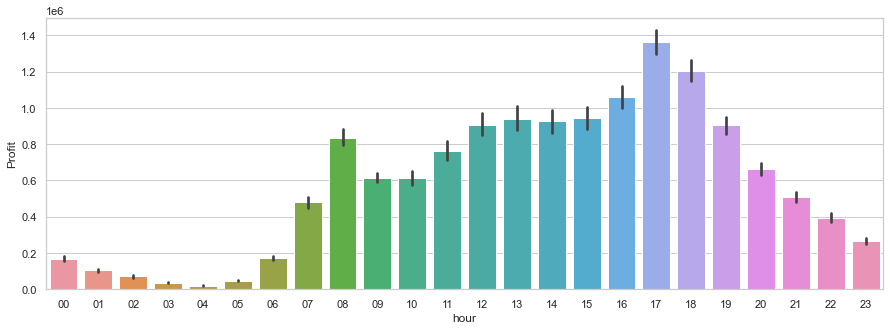

In [309]:
sns.barplot(data = df , x = 'hour' , y = 'Profit' , estimator = np.sum)

In [310]:
group = df.groupby('hour')['rented_bikes_count'].sum().sort_values(ascending = False)
group.to_frame().head()

,rented_bikes_count
hour,
17,213757
18,196472
08,165060
16,144266
19,143767


<AxesSubplot:xlabel='hour', ylabel='rented_bikes_count'>

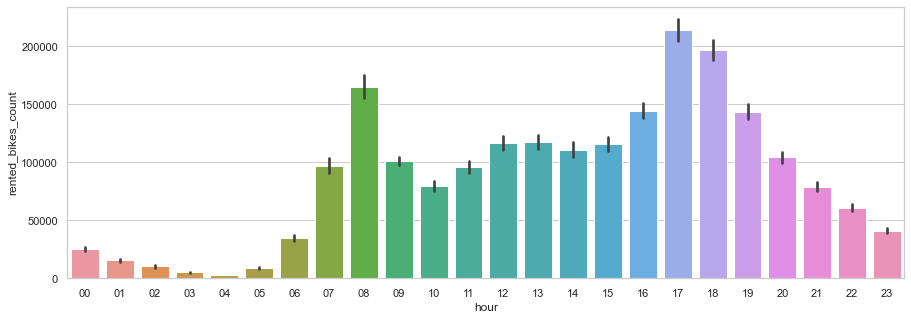

In [311]:
sns.barplot(data = df , x = 'hour' , y = 'rented_bikes_count' , estimator = np.sum)

### For each season what is the highest month profit 2011 ? 

In [312]:
group = df[df['year'] == '2011'].groupby(['season' , 'month'])['Profit'].sum().to_frame()

In [313]:
group.reset_index(inplace = True)

In [314]:
group_max = group.groupby('season')['Profit'].max()

In [315]:
max_profit = group[group['Profit'].isin(group_max)]

In [316]:
max_profit

,season,month,Profit
0,Fall,07,722955.558904
5,Spring,03,258931.884932
8,Summer,06,620938.230137
9,Winter,10,554624.486301


<AxesSubplot:xlabel='season', ylabel='Profit'>

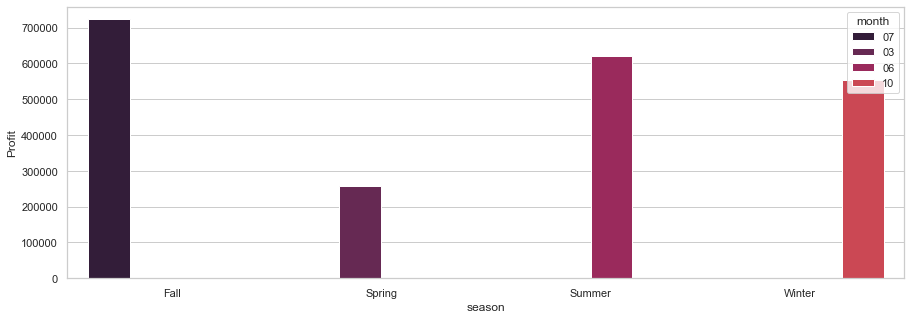

In [317]:
sns.barplot(data = max_profit , x = 'season' , y = 'Profit' , hue = 'month')

<AxesSubplot:xlabel='season', ylabel='Profit'>

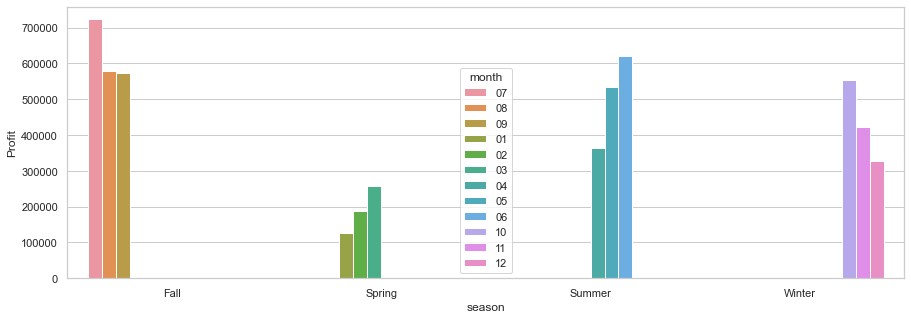

In [318]:
sns.barplot(data = group , x = 'season' , y = 'Profit' , hue = 'month' , estimator = np.max )

### In which Weather gain more Profit ? 

In [319]:
group = df.groupby('weather')['Profit'].sum()
group.sort_values(ascending = False).to_frame().T

weather,Clear,Mist,Rainy,Snowy
Profit,8.062699e+06,2.645321e+06,509603.335616,782.428767


<AxesSubplot:xlabel='weather', ylabel='Profit'>

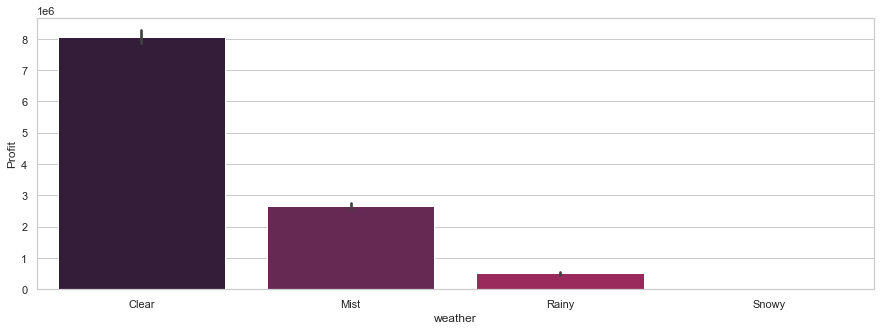

In [320]:
sns.barplot(data = df , x = 'weather' , y = 'Profit' , estimator = np.sum , order = group.index) 

* clear weather gain much Profit

### In which weather more bikes rented ?

In [321]:
group = df.groupby('weather')['rented_bikes_count'].sum()
group.sort_values(ascending = False).to_frame().T

weather,Clear,Mist,Rainy,Snowy
rented_bikes_count,1182406,405992,82288,164


<AxesSubplot:xlabel='weather', ylabel='rented_bikes_count'>

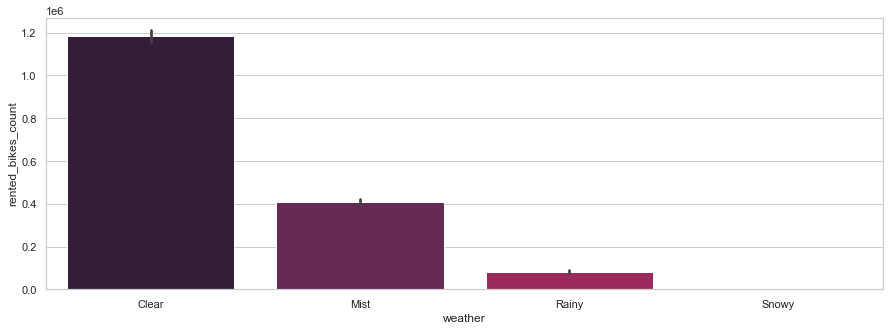

In [322]:
sns.barplot(data = df , x = 'weather' , y = 'rented_bikes_count' , estimator = np.sum , order = group.index)

### For each season , weather show outlier in profit ? 

<AxesSubplot:xlabel='weather', ylabel='Profit'>

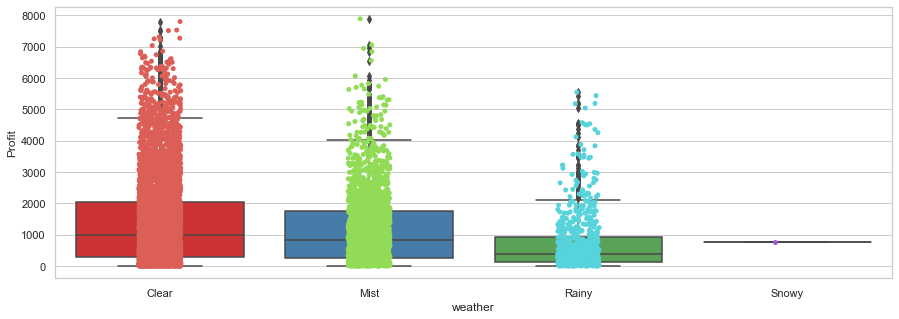

In [342]:
sns.stripplot(data = df , x = 'weather' , y = 'Profit' , palette = 'hls')
sns.boxplot(data = df , x = 'weather' , y = 'Profit')

<AxesSubplot:xlabel='season', ylabel='Profit'>

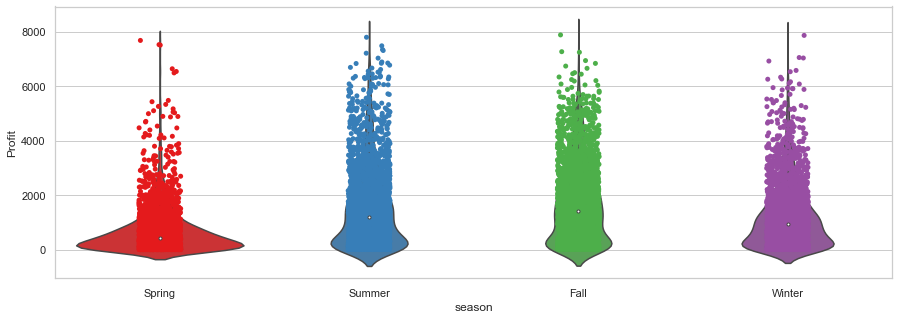

In [343]:
sns.stripplot(data = df , x = 'season' , y = 'Profit')
sns.violinplot(data = df , x = 'season' , y = 'Profit')

* Clear weather is the most one to rent a bike 

### What is the effect of weather , season on renting bikes ? 

<AxesSubplot:xlabel='season', ylabel='rented_bikes_count'>

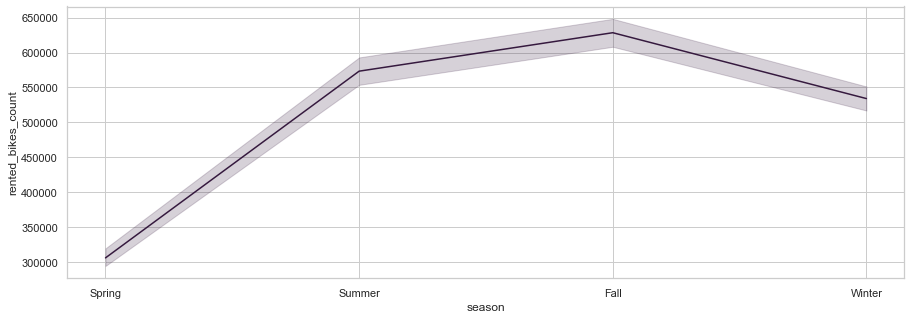

In [325]:
sns.lineplot(data = df , x = 'season' , y = 'rented_bikes_count' , estimator = np.sum)

<AxesSubplot:xlabel='weather', ylabel='rented_bikes_count'>

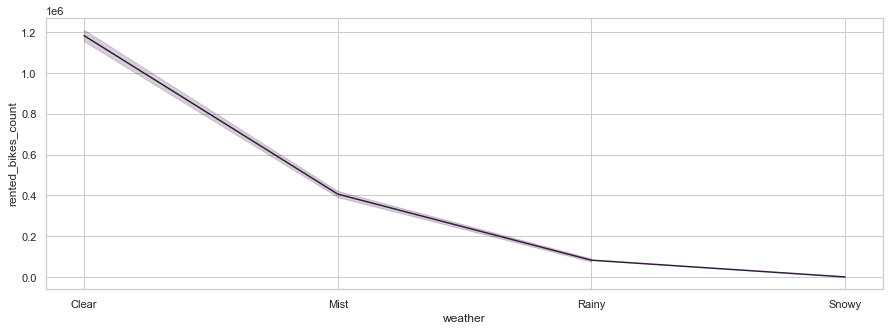

In [326]:
sns.lineplot(data = df , x = 'weather' , y = 'rented_bikes_count' , estimator = np.sum)

### Is there any correlation between Profit and ['temp' , 'humidity' , 'windspeed'] ?

<AxesSubplot:xlabel='humidity', ylabel='Profit'>

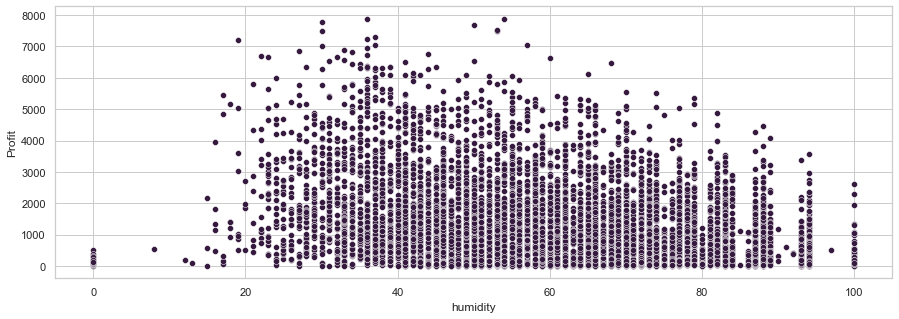

In [327]:
sns.scatterplot(data = df , x = 'humidity' , y = 'Profit')

<AxesSubplot:xlabel='temp', ylabel='Profit'>

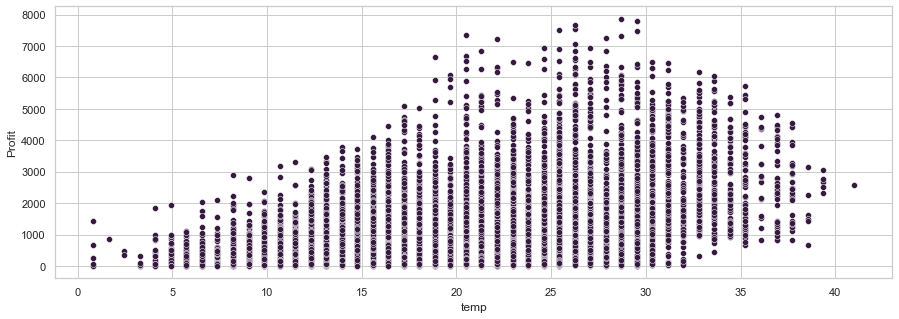

In [328]:
sns.scatterplot(data = df , x = 'temp' , y = 'Profit')

<AxesSubplot:xlabel='windspeed', ylabel='Profit'>

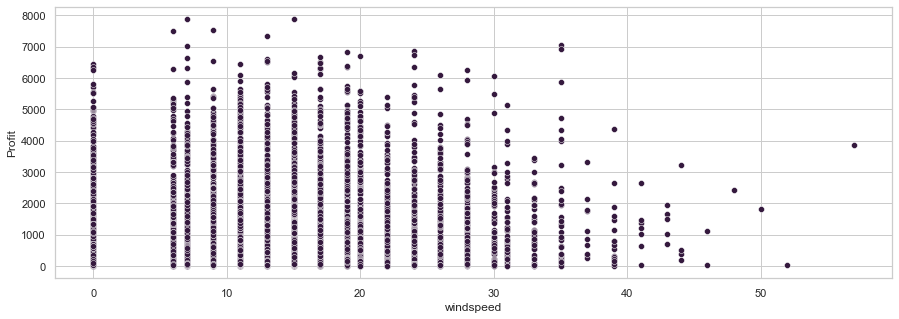

In [329]:
sns.scatterplot(data = df , x = 'windspeed' , y = 'Profit')

<AxesSubplot:>

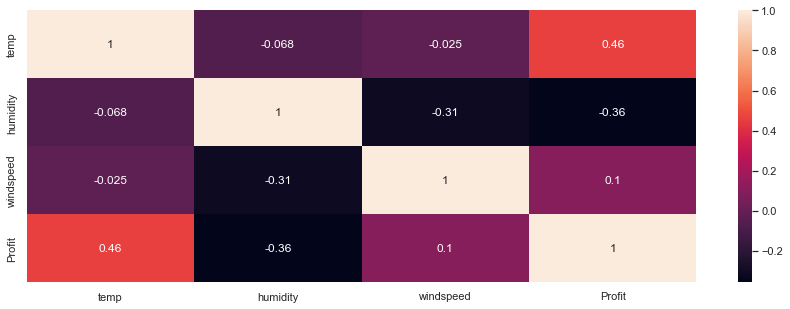

In [330]:
sns.heatmap(df[['temp' , 'humidity' , 'windspeed' , 'Profit']].corr() , annot = True)

* Profit with temprature has nearly strong +ve correlation 
* Profit with humidity has nearly strong -ve correlation
* Profit with wind speed has nearly weak +ve correlation

### Is there correlation between Profit and rented bikes ?

In [331]:
df[['Profit' , 'rented_bikes_count']].corr()

,Profit,rented_bikes_count
Profit,1.00000,0.93449
rented_bikes_count,0.93449,1.00000


In [332]:
df['rented_bikes_count'].corr(df['Profit'])

0.9344898870747524

<AxesSubplot:>

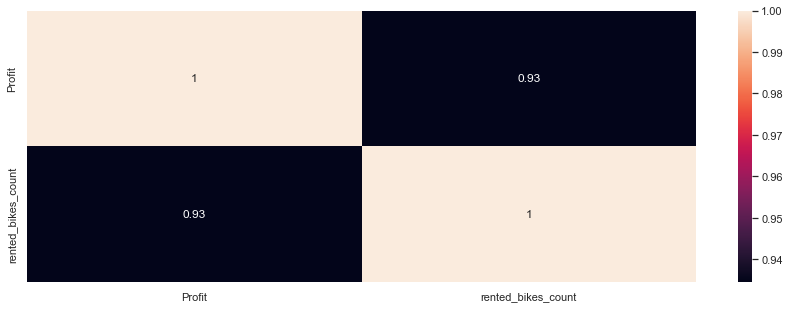

In [333]:
sns.heatmap(df[['Profit' , 'rented_bikes_count']].corr() , annot = True)

<AxesSubplot:xlabel='rented_bikes_count', ylabel='Profit'>

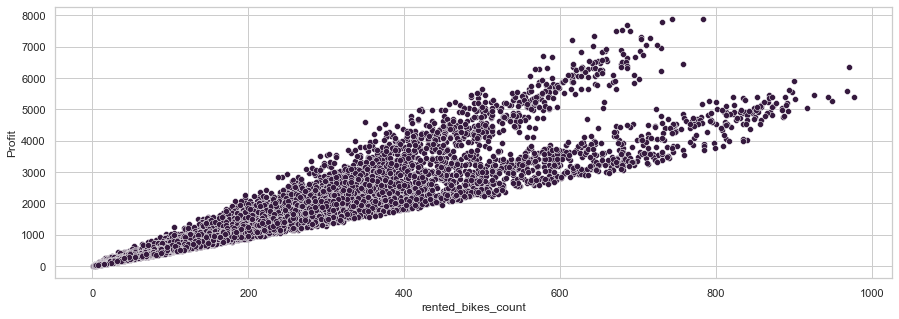

In [334]:
sns.scatterplot(data = df , x = 'rented_bikes_count' , y = 'Profit')

* Very Strong +ve correlation

In [335]:
sns.set_palette('Set1')

<AxesSubplot:xlabel='rented_bikes_count', ylabel='Profit'>

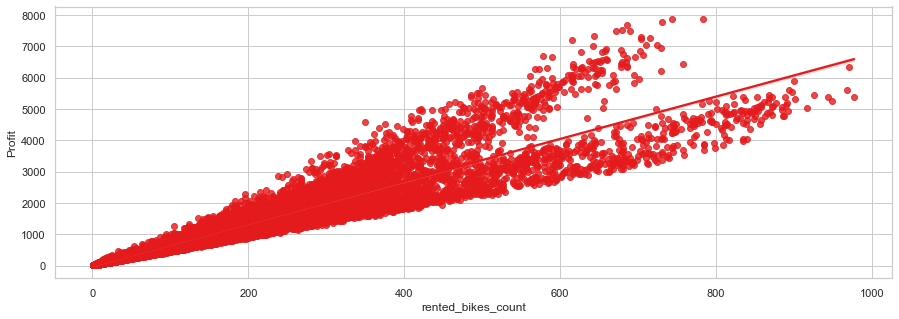

In [336]:
sns.regplot(data = df , x = 'rented_bikes_count' , y = 'Profit')